In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Extraction and Analysis 

In [2]:
titanic_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **I see that Age, Cabin and Emnarked have all some null value. Let's try fill out those missing values**

In [5]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### **Ok as the age has a standard devition of 14, we cannot fill out the the missing values with mean and also there are 177 values we cannot simply remove the missing rows from the table. Hence, we need to remove the whole columns itself** ####

In [6]:
titanic_df.drop('Age', inplace = True, axis = 1)

#### **Let's take look at Cabin** ####

In [7]:
titanic_df.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [8]:
titanic_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [9]:
titanic_df.Cabin.nunique()

147

#### **It seems the number of unique values are 147 out 158 non null cabin values which is about 93% from the available data. Hence, need to drop this column as well** ####

In [10]:
titanic_df.drop('Cabin', inplace = True, axis = 1)

#### **The number of embarked rows that have null values are 2 which very low, therefore instead of dropping the whole column we just drop the empty rows** #### 

In [11]:
#titanic_df.dropna()

# EDA

In [12]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

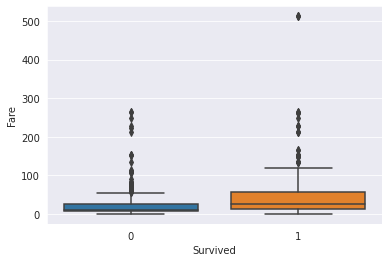

In [13]:
sns.boxplot(y = 'Fare' , x = 'Survived' , data = titanic_df)

#### **It seems the fare is slightly co-related but we may get some patterns on that** ####

<AxesSubplot:xlabel='Embarked', ylabel='count'>

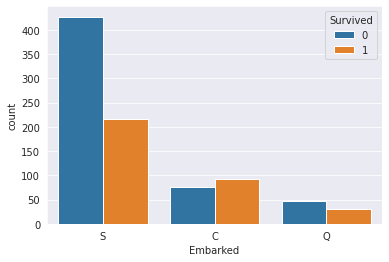

In [14]:
sns.countplot(x = 'Embarked', hue = 'Survived' , data = titanic_df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

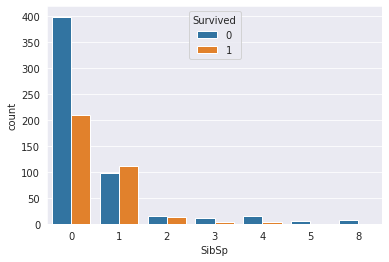

In [15]:
sns.countplot(x = 'SibSp', hue = 'Survived' , data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

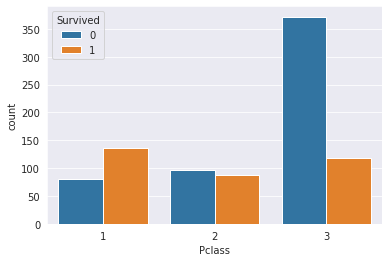

In [16]:
sns.countplot(x = 'Pclass', hue = 'Survived' , data = titanic_df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

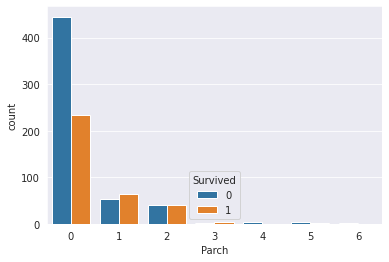

In [17]:
sns.countplot(x = 'Parch', hue = 'Survived' , data = titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

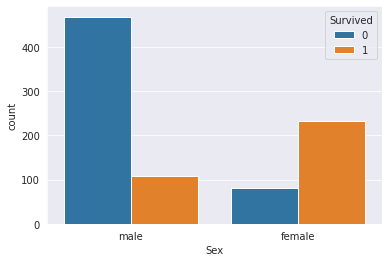

In [18]:
sns.countplot(x = 'Sex', hue = 'Survived' , data = titanic_df)

#### **The above features seems to have co-relation so we should be including it** ####

In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


#### **The ticket feature has majority unique values and it is string value,hence we need to drop this column** ####

In [20]:
titanic_df.drop('Ticket', inplace = True, axis =1)

#### **The passengerId and Name are use for identification thus I am removing the columns** ####

In [21]:
titanic_df.drop(['PassengerId', 'Name'] , inplace = True, axis =1)

# Modeling

#### **I will using Random forest model to predict** ####

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
#test_data.dropna()


features = ["Pclass", "Sex", "SibSp", "Parch"]
#X = pd.get_dummies(titanic_df[features])
#X_test = pd.get_dummies(test_data[features])

X = pd.get_dummies(titanic_df[features])
y = titanic_df["Survived"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier


In [26]:
model = KNeighborsClassifier()

model.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report



In [29]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[154  21]
 [ 35  85]]


              precision    recall  f1-score   support

           0       0.81      0.88      0.85       175
           1       0.80      0.71      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295



In [30]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

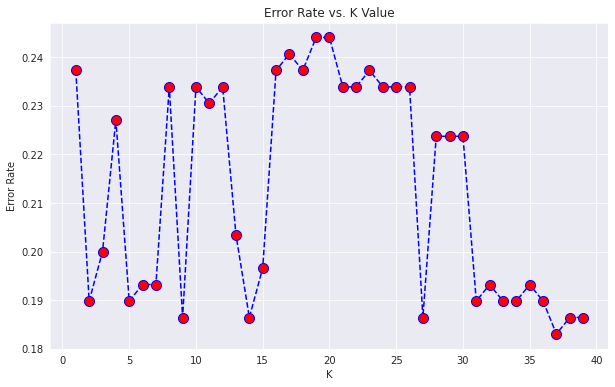

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [33]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[152  23]
 [ 31  89]]


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       175
           1       0.79      0.74      0.77       120

    accuracy                           0.82       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [34]:
y1 = titanic_df["Survived"]

test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
#test_data.dropna()


features = ["Pclass", "Sex", "SibSp", "Parch"]
X1 = pd.get_dummies(titanic_df[features])
X_test1 = pd.get_dummies(test_data[features])


In [35]:
model.fit(X1, y1)
predictions = knn.predict(X_test1)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
